## Final Task:
This is your final evaluation for the project. As decided, we will be predicting images of people into three classes: `without_mask`, `mask_weared_incorrect` and `with_mask`. 

In [1]:
import tensorflow as tf

### Loading the dataset
Make a copy of the dataset given to you in your Google Drive (keep it outside, don't put it in any folder to avoid inconvenience). Ensure it is named as `Mask_Dataset` or change the path (the variable `data_dir`) accordingly.

In [2]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
import pathlib

path='/content/drive/MyDrive/Mask_Dataset/'
data_dir = pathlib.Path(path)

### Know the Dataset
Most of the code is written for you as you aren't used to these libraries. You are to go through the documentation for your benefit.

In [10]:
# Print image count
image_count = len(list(data_dir.glob('*/*.png')))
print(image_count)

0


In [11]:
# Print Output Labels
import os
output_classes = os.listdir(data_dir)
print(output_classes)

['mask_weared_incorrect', 'without_mask', 'with_mask']


[2994, 2994, 2994]


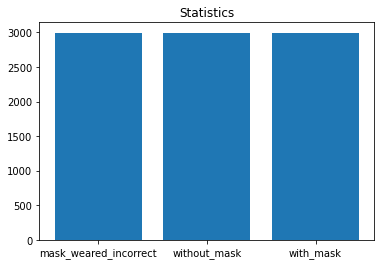

In [12]:
# Plot count of each ouput label
import matplotlib.pyplot as plt

count=[]
for label in output_classes:
  this_path=path+label
  dir=pathlib.Path(this_path)
  im_count=os.listdir(dir)
  count.append(len(im_count))

print(count)

plt.bar(output_classes,count)
plt.title("Statistics")
plt.show()

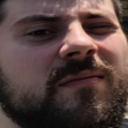

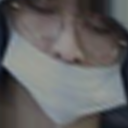

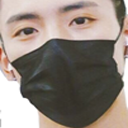

In [13]:
# Check some sample images (Use of cv2)
import cv2
from google.colab.patches import cv2_imshow
img1=cv2.imread(str(list(data_dir.glob('without_mask/*'))[0]))
cv2_imshow(img1)
img2=cv2.imread(str(list(data_dir.glob('mask_weared_incorrect/*'))[2]))
cv2_imshow(img2)
img3=cv2.imread(str(list(data_dir.glob('with_mask/*'))[5]))
cv2_imshow(img3)
cv2.waitKey(0)
cv2.destroyAllWindows()
# Your code

In [14]:
# Check shape of the images in your dataset. This will be helpful while specifying input_shape in your Transfer Learning Model
print(img1.shape)
print(img2.shape)
print(img3.shape)

(128, 128, 3)
(128, 128, 3)
(128, 128, 3)


In [16]:
# Check if all the images have same shape, else you need to resize them to some common size
x=img1.shape
cases=(
    list(data_dir.glob('without_mask/*')),
    list(data_dir.glob('mask_weared_incorrect/*')),
    list(data_dir.glob('with_mask/*'))
)
for i in cases:
  for j in range(2994):
    img=cv2.imread(str(i[j]))
    y=img.shape
    if(x!=y):
      print("different")
      break
print("same")

# The code provided as it is above in the template will help 


same


In [ ]:
# If the shape is variable, reshape to a common size 

# If it is same, prove it

In [ ]:
# Anything else you want to plot/experiment

### Model Definition
Choose a model for Transfer Learning (You may also experment with multiple models and keep all of them in this notebook)

In [50]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential

In [51]:
# Choose and define base model
base_model=tf.keras.applications.MobileNetV2(
    include_top=False,
    weights='imagenet',
    input_tensor=None,
    input_shape=(128,128,3),
)

In [52]:
# Print base model summary and have a look at the layers
base_model.summary()

Model: "mobilenetv2_1.00_128"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 64, 64, 32)   864         ['input_4[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 64, 64, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 64, 64, 32)   0           ['bn_Conv1[0][

In [53]:
# As we're using Transfer Learning, you do not need to train all the layers. Freeze all of the layers or train some layers (experiment)
base_model.trainable=False
base_model.summary()

Model: "mobilenetv2_1.00_128"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 64, 64, 32)   864         ['input_4[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 64, 64, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 64, 64, 32)   0           ['bn_Conv1[0][

In [54]:
# Append Fully connected/custom Conv2D/Dropout/MaxPooling layers to the base model
from tensorflow import keras
from keras import layers
model=keras.Sequential([base_model,layers.Flatten(),
                  layers.Dense(128,activation='relu'),
                  layers.Dropout(0.5),
                  layers.Dense(64,activation='relu'),
                  ])

In [55]:
# Add the final output layer
model.add(layers.Dense(3,activation='softmax'))


In [56]:
# Print your model's summary
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_128 (Funct  (None, 4, 4, 1280)       2257984   
 ional)                                                          
                                                                 
 flatten_3 (Flatten)         (None, 20480)             0         
                                                                 
 dense_9 (Dense)             (None, 128)               2621568   
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_10 (Dense)            (None, 64)                8256      
                                                                 
 dense_11 (Dense)            (None, 3)                 195       
                                                      

In [57]:
# Compile you model (set the parameters like loss/optimizers/metrics)
model.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = "accuracy")

### Data Augmentation and Pre-processing
Augment the data. You may also try dyanamic augmentation using [`tf.keras.preprocessing.image.ImageDataGenerator `](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator).   
You may use [`tf.keras.applications.vgg16.preprocess_input`](https://www.tensorflow.org/api_docs/python/tf/keras/applications/vgg16/preprocess_input)(or some other base model's utility) for pre-processing (can also be passed as a parameter to `ImageDataGenerator`)

In [58]:
from keras.applications.vgg16 import preprocess_input # Change according to your base model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    validation_split=0.2)
# Your code 

### Training and Validation Dataset  
Split the dataset into training and validation (We'll be looking for your validation accuracy, assume we are using complete dataset for now). 

Hint: `flow_from_directory` used with `ImageDataGenerator` will simplify things for you.

In [59]:
# Your code
train=datagen.flow_from_directory(path,
                                   target_size=(128,128),
                                   color_mode='rgb',
                                   batch_size=64,
                                   class_mode='categorical')

validate=datagen.flow_from_directory(path,
                                  target_size=(128,128),
                                  color_mode='rgb',
                                  batch_size=64,
                                  class_mode='categorical',
                                  subset='validation')

Found 8982 images belonging to 3 classes.
Found 1794 images belonging to 3 classes.


### Training  
Train your model for some epochs and plot the graph. Try and save your best model. Experiment with the parameters of `model.fit`

In [60]:
from keras.callbacks import ModelCheckpoint
history= model.fit(train,validation_data=validate,epochs=10)
# ModelCheckpoint is helpful to save the model giving best results (brownie points)

Epoch 1/10
141/141 [==============================] - 124s 438ms/step - loss: 0.5609 - accuracy: 0.8346 - val_loss: 0.1984 - val_accuracy: 0.9359
Epoch 2/10
141/141 [==============================] - 59s 420ms/step - loss: 0.2512 - accuracy: 0.9110 - val_loss: 0.1714 - val_accuracy: 0.9348
Epoch 3/10
141/141 [==============================] - 60s 428ms/step - loss: 0.2354 - accuracy: 0.9163 - val_loss: 0.1710 - val_accuracy: 0.9387
Epoch 4/10
141/141 [==============================] - 60s 426ms/step - loss: 0.2045 - accuracy: 0.9247 - val_loss: 0.1627 - val_accuracy: 0.9504
Epoch 5/10
141/141 [==============================] - 59s 421ms/step - loss: 0.2040 - accuracy: 0.9272 - val_loss: 0.1511 - val_accuracy: 0.9493
Epoch 6/10
141/141 [==============================] - 60s 425ms/step - loss: 0.1970 - accuracy: 0.9306 - val_loss: 0.1412 - val_accuracy: 0.9465
Epoch 7/10
141/141 [==============================] - 60s 426ms/step - loss: 0.1806 - accuracy: 0.9329 - val_loss: 0.1322 - val_a

### Evaluate the performance

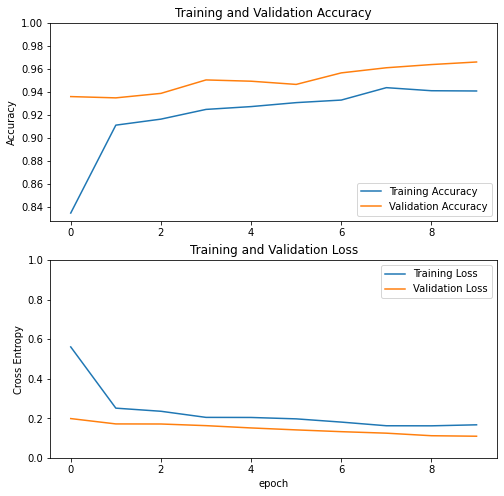

In [61]:
# Plot training & validation loss/accuracy values
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [62]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
validation_classes = []
validation_images = []
for i in range( -(-validate.samples // validate.batch_size)):
        batch = validate.next()
        expected = np.argmax(batch[1], axis=1)
        validation_classes.extend(expected)
        validation_images.extend(batch[0])
validation_classes = np.array(validation_classes)
validation_images = np.array(validation_images)
y_pred = np.argmax(model.predict(validation_images), axis=1)
print(classification_report(validation_classes, y_pred,target_names = ['without_mask', 'mask_weared_incorrect', 'with_mask']))
# print classification report

                       precision    recall  f1-score   support

         without_mask       0.97      0.98      0.98       598
mask_weared_incorrect       0.95      0.98      0.96       598
            with_mask       0.99      0.95      0.97       598

             accuracy                           0.97      1794
            macro avg       0.97      0.97      0.97      1794
         weighted avg       0.97      0.97      0.97      1794

